# Importing Libraries and Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 12)})
plt.figure(figsize=(20, 20));

<Figure size 2000x2000 with 0 Axes>

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Cleaning the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing data in the dataset.

In [6]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


Account Names are irrelevant because it will not give us any significant insight.

# EDA

In [7]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


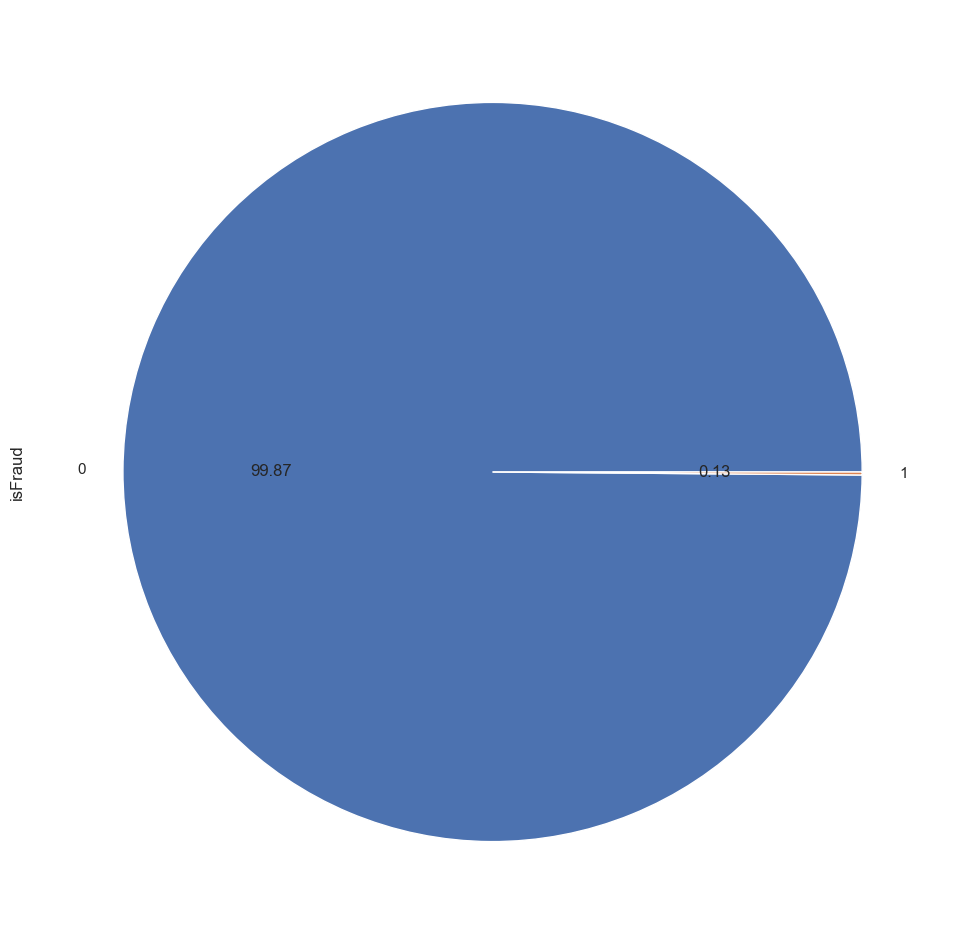

In [9]:
df['isFraud'].value_counts().plot.pie(autopct='%.2f');

 This is a very imbalanced dataset so for the purpose of EDA we should balance the Data.

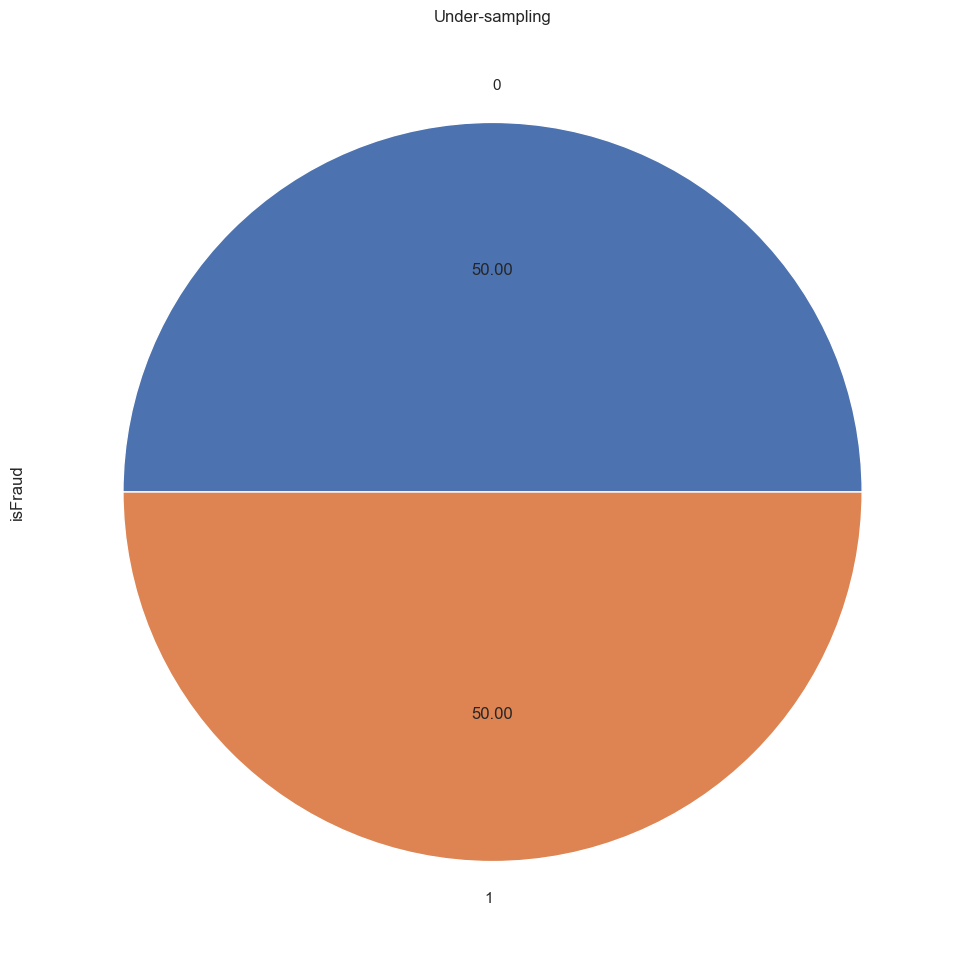

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)  # Numerical value
X_train_balanced, y_train_balanced = rus.fit_resample(df.drop(['isFraud'], axis=1), df['isFraud'])
ax = y_train_balanced.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [11]:
y_train_balanced.shape

(16426,)

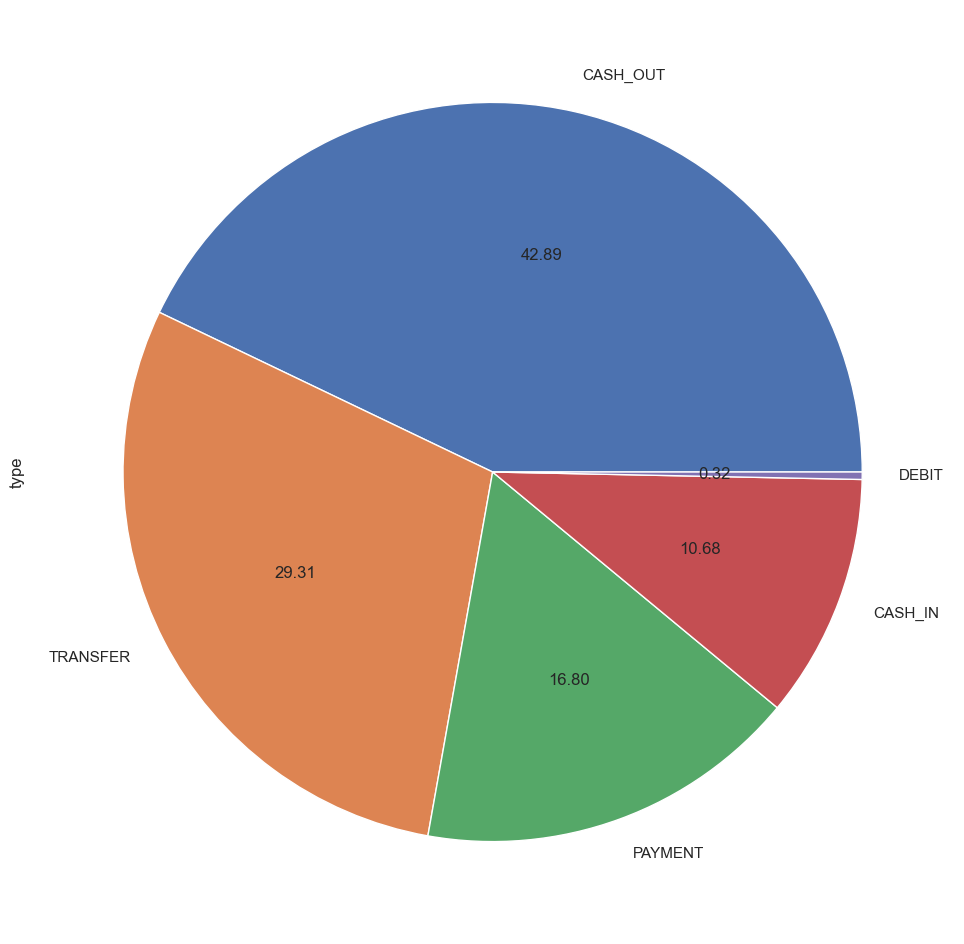

In [12]:
X_train_balanced['type'].value_counts().plot.pie(autopct='%.2f');

In [13]:
# Lets compare the balanced dataset to the original dataset to see if the random sampler is not giving us skewed data.

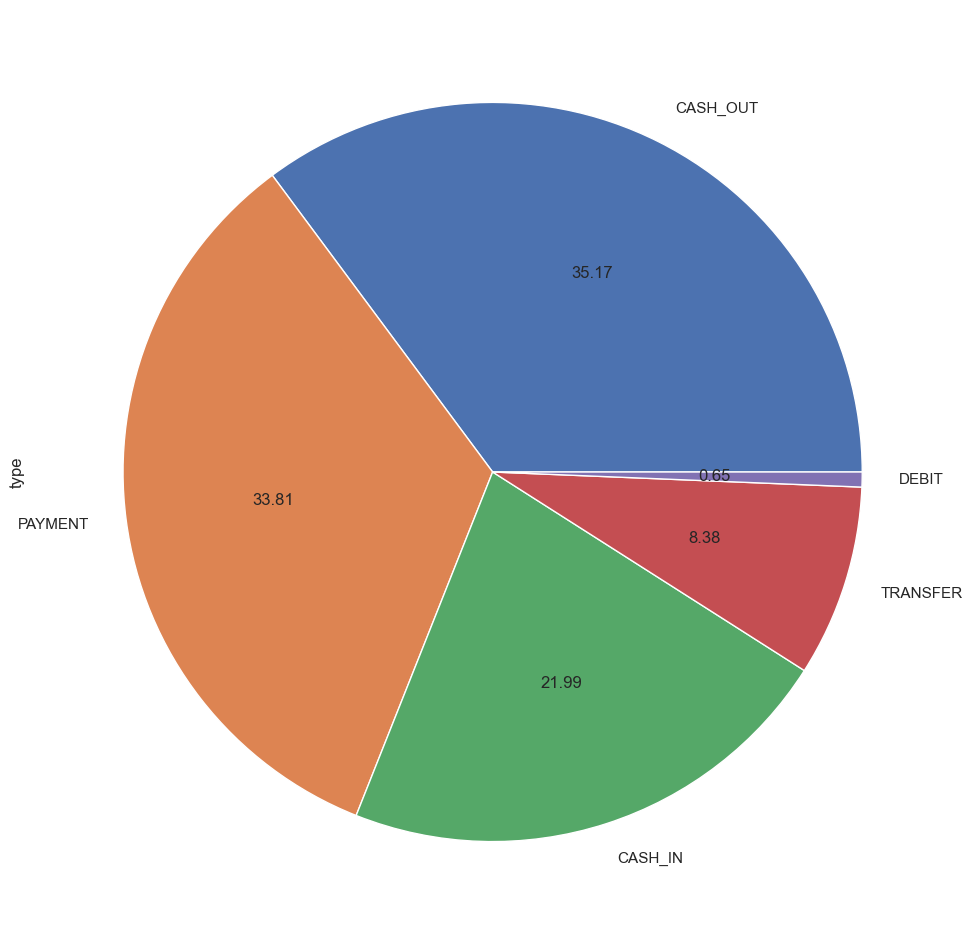

In [14]:
df['type'].value_counts().plot.pie(autopct='%.2f');

Although the percentage of data is bit different it does a good job in keeping it in correct propotions.

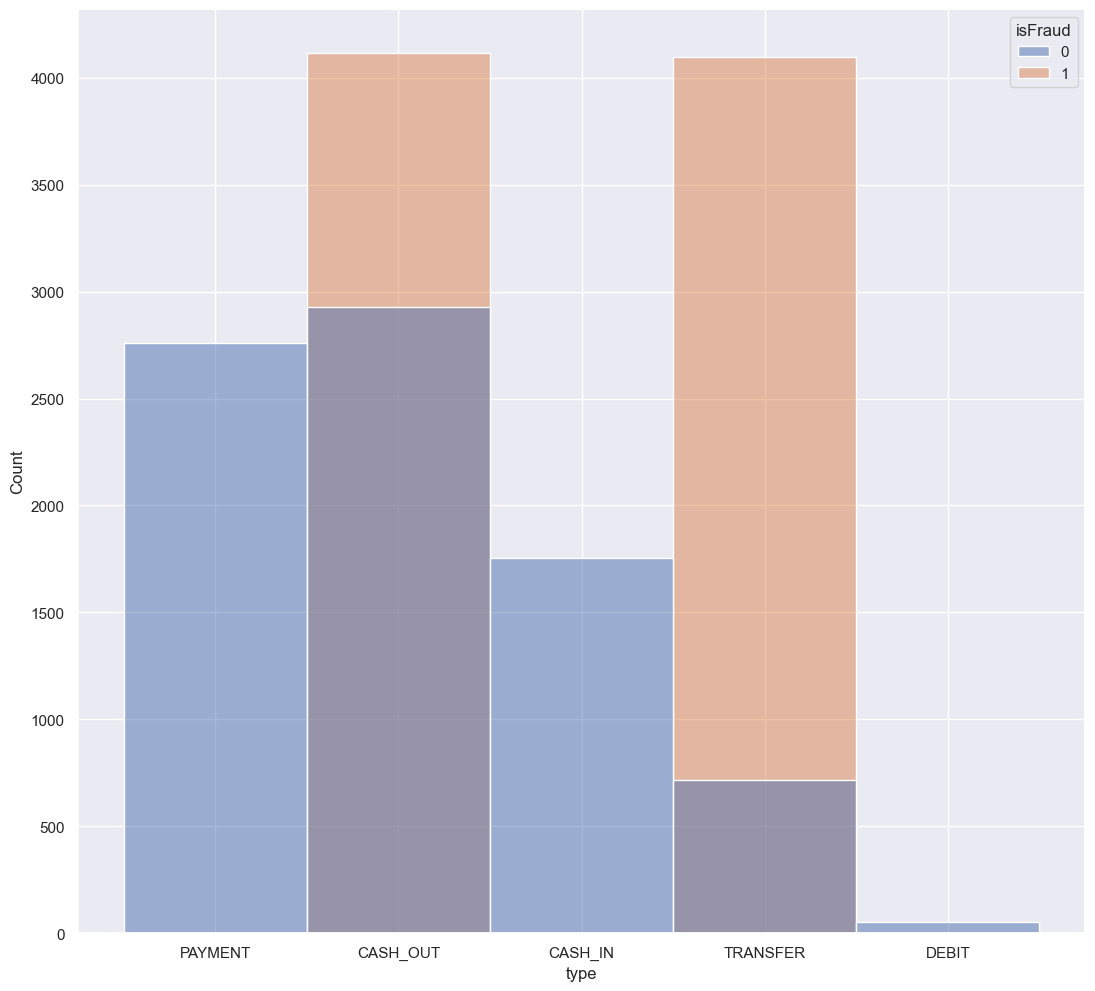

In [15]:
sns.histplot(x=X_train_balanced['type'], hue=y_train_balanced);

All the fradulent transactions happen in CASH_OUT and TRANSFER type.This makes sense as a thief would try to transfer the money to a different account or take the cash out directly.

In [20]:
X_y_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)

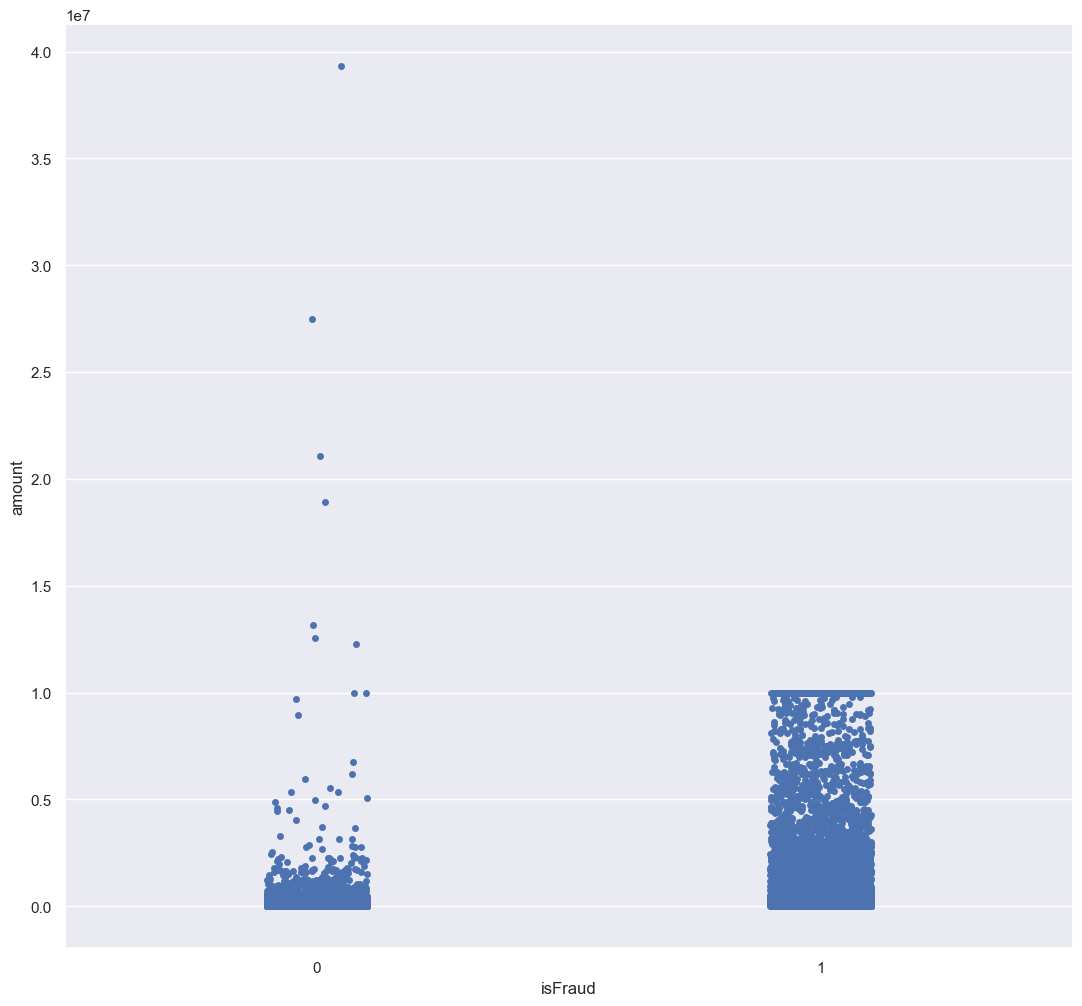

In [21]:
sns.stripplot(y=X_train_balanced['amount'], x=y_train_balanced);


We can see that fraud transaction tends to come at lower as well as higher amount. But the real transaction are mostly lower amount and very few higher amount. Thiefs can try to take out high amount as they can think that they will be able ot use the credit card only once.

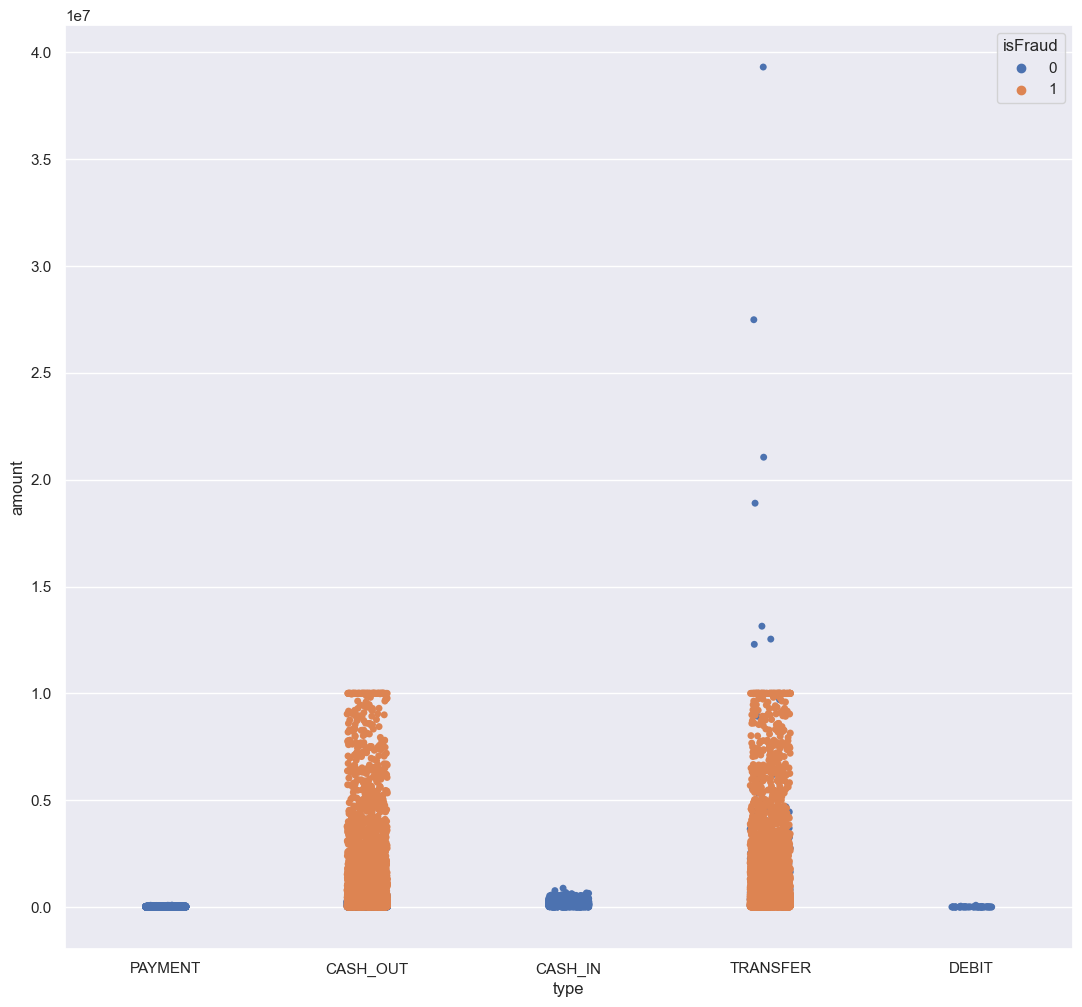

In [22]:
sns.stripplot(y=X_train_balanced['amount'], x=X_train_balanced['type'], hue=y_train_balanced);

We already knew that Cash and Transfer transactions were the types that were used in fraud but we can also see that because those are the ones used for fraud that they are also the types that include the highest money amount

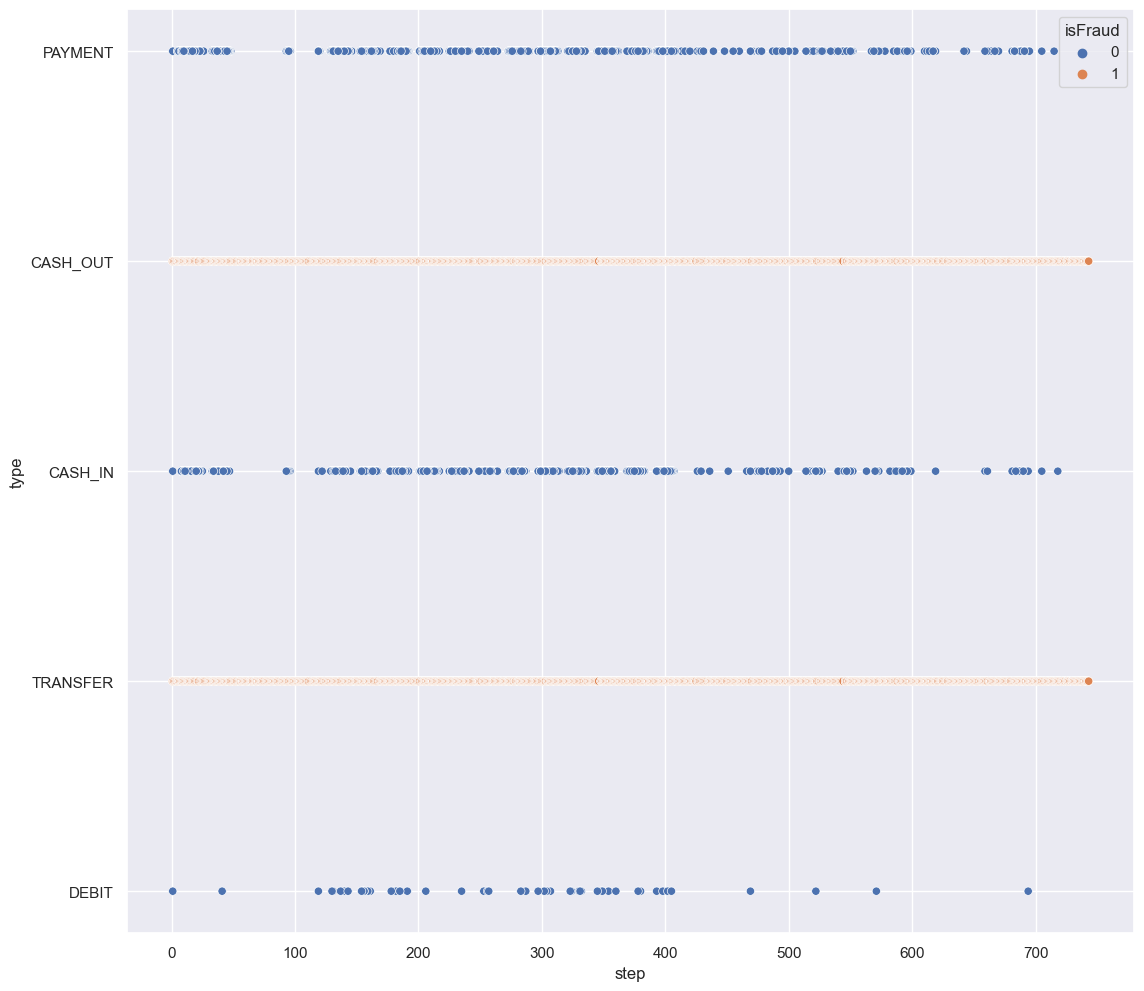

In [23]:
# Looking at if the steps column is relevant or not
sns.scatterplot(data=X_y_balanced, x='step',y='type', hue='isFraud');


There doesn't seem to be a correlation. Because why would there be ? Fraud isn't predictable by time. So lets drop this column

In [24]:
X_y_balanced.drop(['step'], axis=1, inplace=True);

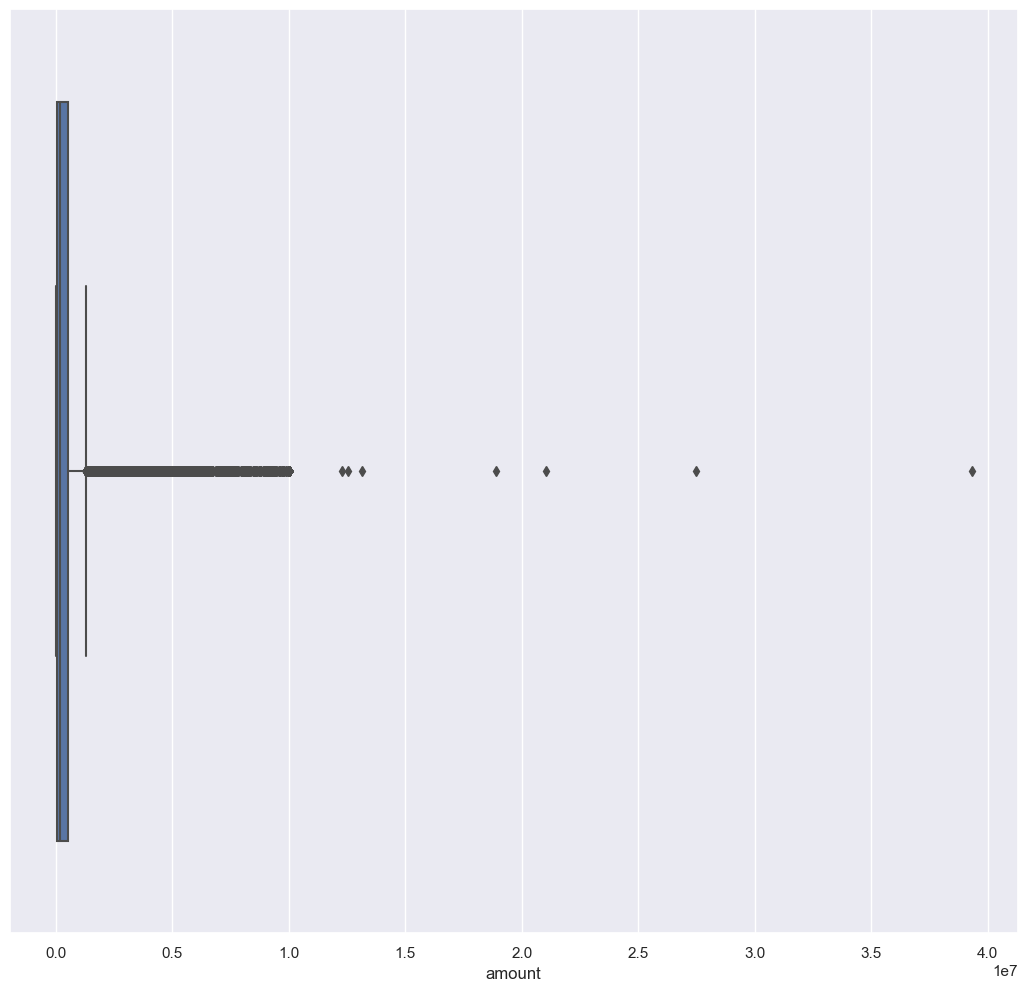

In [25]:
# Lets look at the outliers
sns.boxplot(x=X_y_balanced['amount'], hue=X_y_balanced['isFraud']);

While there are some outliers here most of them look like they are fraud so we''ll keep them

# Feature Engineering

We can make a new column where we store the difference of oldbalanceOrg and newbalanceOrg

In [26]:
old_new_diff = pd.Series((X_y_balanced['oldbalanceOrg'] - X_y_balanced['newbalanceOrig']), name='old_new_diff', index=None)

In [27]:
old_new_diff.head()

0         0.00
1      3555.60
2         0.00
3         0.00
4   -151572.67
Name: old_new_diff, dtype: float64

Adding the series to the dataframe

In [28]:
X_y_balanced = pd.concat([X_y_balanced, old_new_diff], axis=1)

C:\Users\TARUN\AppData\Local\Temp\ipykernel_17392\2757906472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_y_balanced.corr())


<Axes: >

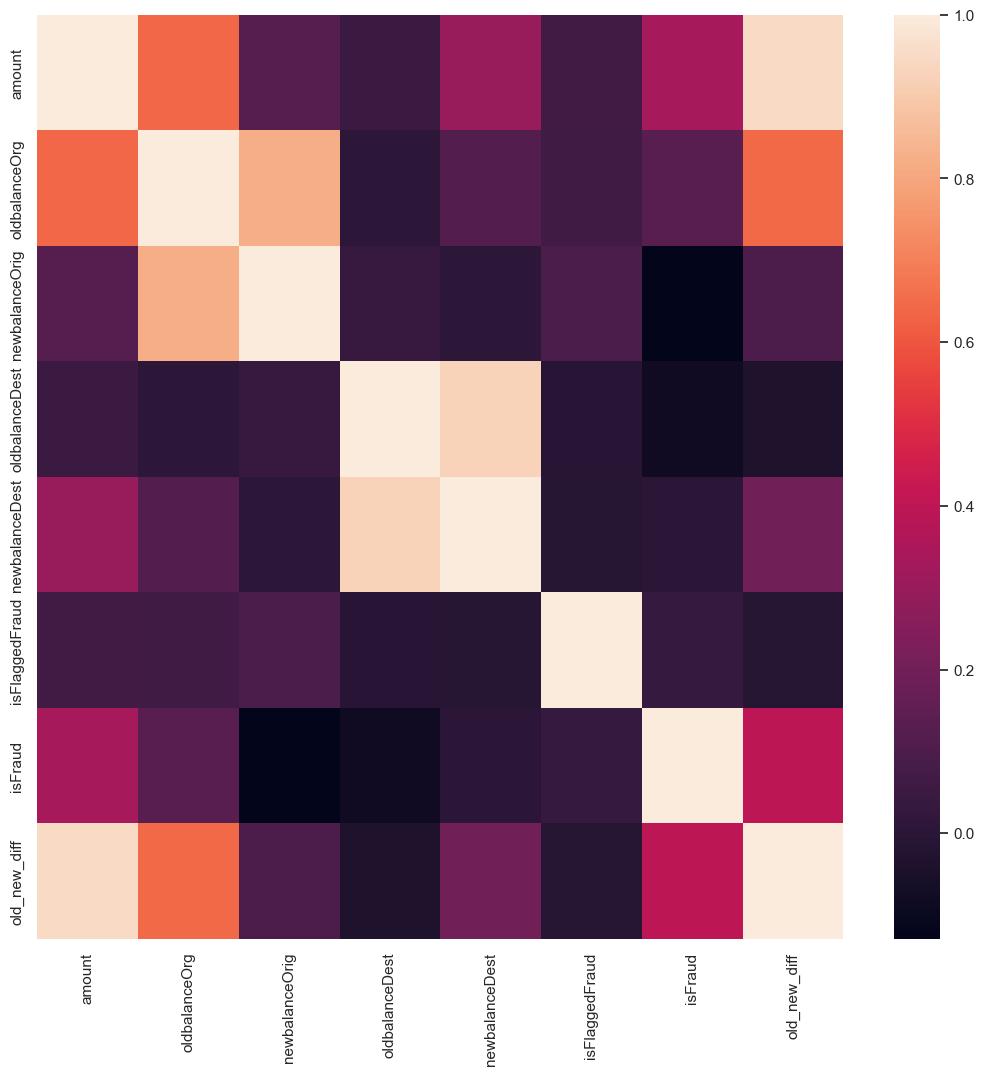

In [29]:
sns.heatmap(X_y_balanced.corr())

We can see that old_new_diff is more correlated to isFraud them oldbalanceOrg and newbalanceOrg

We can also see that isFlaggedFraud is not really correlated to isFraud so a potential good feature is not really very important as per the data.

# Data Perprocessing

In [30]:
X_y_balanced.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,old_new_diff
0,PAYMENT,11064.11,0.0,0.00,0.00,0.00,0,0,0.00
1,PAYMENT,3555.60,9455.0,5899.40,0.00,0.00,0,0,3555.60
2,CASH_OUT,285868.82,0.0,0.00,1089509.60,1375378.42,0,0,0.00
3,CASH_OUT,81849.31,0.0,0.00,100574.89,182424.19,0,0,0.00
4,CASH_IN,151572.67,21452818.6,21604391.27,3292143.54,3140570.87,0,0,-151572.67


In [31]:
X = X_y_balanced.drop(['isFraud'],axis=1)
y = X_y_balanced['isFraud']

In [32]:
encoded_types = pd.get_dummies(X['type'])
X.drop(['type'], axis=1, inplace=True)
encoded_types.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [33]:
X = pd.concat([encoded_types, X], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Machine Learning Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier



## Random Forest

In [37]:
clf = RandomForestClassifier()
clf.fit(X = X_train, y = y_train)

RandomForestClassifier()

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1545,   98],
       [   6, 1637]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, recall_score

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9683505782105903
Rec: 0.9963481436396835


In [40]:
from sklearn.metrics import f1_score

F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9683505782105903

In [41]:
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([1.05323768, 0.99121761, 1.00622392, 0.99622321, 0.99721026,
       0.99622321, 1.02322412, 1.00122523, 0.98622346, 1.00020957]), 'score_time': array([0.02100968, 0.01999474, 0.02101827, 0.02200603, 0.02100801,
       0.02100515, 0.0210104 , 0.02099848, 0.02000451, 0.02000475]), 'test_accuracy': array([0.99238965, 0.98934551, 0.99315068, 0.98782344, 0.98858447,
       0.99467275, 0.99315068, 0.99391172, 0.99315068, 0.99315068]), 'test_recall': array([0.99543379, 0.99543379, 0.99543379, 0.99391172, 0.99695586,
       0.99695586, 0.99695586, 0.99847793, 0.99543379, 0.99391172]), 'test_f1': array([0.99241275, 0.98940998, 0.99316629, 0.98789713, 0.98867925,
       0.99468489, 0.99317665, 0.99393939, 0.99316629, 0.99315589])}

Average cross-validation accuracy score: 0.9919330289193302
Average cross-validation recall score: 0.9958904109589041
Average cross-validation f1 score: 0.9919688502692677


## Logistic Regression

In [42]:
clf = LogisticRegression()
clf.fit(X = X_train, y = y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1487,  156],
       [  14, 1629]], dtype=int64)

In [44]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9482653682288497
Rec: 0.9914790018259282


In [45]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9482653682288497

In [46]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.05502033, 0.04400849, 0.05901408, 0.05101395, 0.05601382,
       0.05201149, 0.046067  , 0.04701161, 0.05899978, 0.05001187]), 'score_time': array([0.00400877, 0.00400019, 0.00300026, 0.00299692, 0.0030005 ,
       0.00400043, 0.00399852, 0.00301313, 0.00400281, 0.00399876]), 'test_accuracy': array([0.95053272, 0.93607306, 0.94520548, 0.94063927, 0.93987823,
       0.93455099, 0.9414003 , 0.94672755, 0.9391172 , 0.94901065]), 'test_recall': array([0.9391172 , 0.93455099, 0.93150685, 0.93455099, 0.92694064,
       0.92694064, 0.94216134, 0.94672755, 0.92846271, 0.92846271]), 'test_f1': array([0.94996151, 0.93597561, 0.94444444, 0.94027565, 0.93909021,
       0.93404908, 0.94144487, 0.94672755, 0.93846154, 0.94794095])}

Average cross-validation accuracy score: 0.9423135464231354
Average cross-validation recall score: 0.9339421613394215
Average cross-validation f1 score: 0.9418371404612994


## K Neighbors Classifier

In [47]:
clf = KNeighborsClassifier()
clf.fit(X=X_train, y=y_train);

In [48]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1481,  162],
       [  38, 1605]], dtype=int64)

In [49]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9391357273280584
Rec: 0.9768715763846622


In [50]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9391357273280584

In [51]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.03300953, 0.03000593, 0.03000617, 0.03100634, 0.03100681,
       0.03100562, 0.03100586, 0.0300045 , 0.03100514, 0.03300548]), 'score_time': array([0.08100629, 0.0790174 , 0.07701755, 0.07901859, 0.07901883,
       0.07701898, 0.07802057, 0.07802105, 0.07901955, 0.07202911]), 'test_accuracy': array([0.9695586 , 0.97031963, 0.96803653, 0.96347032, 0.96118721,
       0.96879756, 0.97336377, 0.96879756, 0.96803653, 0.9718417 ]), 'test_recall': array([0.97869102, 0.9847793 , 0.97412481, 0.97716895, 0.96803653,
       0.97564688, 0.97564688, 0.97564688, 0.97564688, 0.97412481]), 'test_f1': array([0.96983409, 0.97074269, 0.96822995, 0.96396396, 0.96145125,
       0.96900983, 0.97342445, 0.96900983, 0.96827795, 0.97190585])}

Average cross-validation accuracy score: 0.9683409436834094
Average cross-validation recall score: 0.975951293759513
Average cross-validation f1 score: 0.9685849832948547


## Gaussian Naive Bayes

In [52]:
clf = GaussianNB()

clf.fit(X=X_train, y=y_train);

In [53]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1643,    0],
       [1639,    4]], dtype=int64)

In [54]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.5012172854534388
Rec: 0.002434570906877663


In [55]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.5012172854534388

In [56]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.0049994 , 0.00498796, 0.00400114, 0.00499463, 0.00400472,
       0.00400472, 0.0039928 , 0.00401688, 0.00599122, 0.00399995]), 'score_time': array([0.00401545, 0.00400162, 0.0050149 , 0.0040009 , 0.00499439,
       0.00400019, 0.00399947, 0.00399661, 0.00399995, 0.00400519]), 'test_accuracy': array([0.77473364, 0.76103501, 0.79375951, 0.78082192, 0.7716895 ,
       0.77473364, 0.77245053, 0.79071537, 0.78234399, 0.78386606]), 'test_recall': array([0.99695586, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99847793, 1.        , 1.        , 1.        ]), 'test_f1': array([0.81569116, 0.80712531, 0.82902208, 0.82022472, 0.81412639,
       0.81614907, 0.81440099, 0.82693518, 0.82125   , 0.82227785])}

Average cross-validation accuracy score: 0.7786149162861492
Average cross-validation recall score: 0.9995433789954337
Average cross-validation f1 score: 0.8187202748616462


## Decison Tree 

In [57]:
clf = DecisionTreeClassifier()

clf.fit(X=X_train, y=y_train);

In [58]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1529,  114],
       [   9, 1634]], dtype=int64)

In [59]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9625684723067559
Rec: 0.9945222154595252


In [60]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9625684723067559

In [61]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.03300738, 0.03300095, 0.03300524, 0.03500867, 0.03300285,
       0.03200603, 0.03400707, 0.03300714, 0.03300595, 0.03300452]), 'score_time': array([0.00500274, 0.00400233, 0.00500154, 0.00400496, 0.00300217,
       0.00400138, 0.00400162, 0.00400186, 0.00400376, 0.00400186]), 'test_accuracy': array([0.99010654, 0.98934551, 0.9870624 , 0.98554033, 0.99086758,
       0.99391172, 0.99010654, 0.99010654, 0.98630137, 0.98934551]), 'test_recall': array([0.99086758, 0.99391172, 0.98325723, 0.99086758, 0.99695586,
       0.99695586, 0.99391172, 0.99847793, 0.98325723, 0.99086758]), 'test_f1': array([0.99011407, 0.98939394, 0.98701299, 0.98561696, 0.99092284,
       0.9939302 , 0.99014405, 0.99018868, 0.98625954, 0.9893617 ])}

Average cross-validation accuracy score: 0.9892694063926941
Average cross-validation recall score: 0.9919330289193302
Average cross-validation f1 score: 0.9892944965022223


## Bagging Classifier

In [62]:
clf = BaggingClassifier()

clf.fit(X=X_train, y=y_train);

In [63]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1551,   92],
       [   5, 1638]], dtype=int64)

In [64]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9704808277541084
Rec: 0.996956786366403


In [65]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9704808277541084

In [66]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.29906607, 0.28507638, 0.28005171, 0.28406167, 0.27906203,
       0.28205419, 0.27607059, 0.2600491 , 0.29007721, 0.27107334]), 'score_time': array([0.00700164, 0.00599623, 0.00700068, 0.00600195, 0.00600266,
       0.006001  , 0.006006  , 0.00599813, 0.0059886 , 0.00600243]), 'test_accuracy': array([0.99315068, 0.99086758, 0.99315068, 0.98858447, 0.98934551,
       0.99391172, 0.99010654, 0.99467275, 0.98858447, 0.99238965]), 'test_recall': array([0.99543379, 0.99695586, 0.99543379, 0.99238965, 0.99695586,
       0.99847793, 0.99695586, 0.99847793, 0.98782344, 0.99238965]), 'test_f1': array([0.99316629, 0.99092284, 0.99316629, 0.98862775, 0.98942598,
       0.99393939, 0.99017385, 0.99469295, 0.98857578, 0.99238965])}

Average cross-validation accuracy score: 0.9914764079147641
Average cross-validation recall score: 0.9951293759512938
Average cross-validation f1 score: 0.9915080769413583


## Ada Boost Classifier

In [67]:
clf = AdaBoostClassifier()

clf.fit(X=X_train, y=y_train);

In [68]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1397,  246],
       [  23, 1620]], dtype=int64)

In [69]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9181375532562386
Rec: 0.9860012172854534


In [70]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9181375532562387

In [71]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.54712367, 0.5611279 , 0.51511502, 0.51811719, 0.52711391,
       0.54341221, 0.50610876, 0.52734923, 0.55212355, 0.54112196]), 'score_time': array([0.01400232, 0.01300049, 0.01401615, 0.01400328, 0.01500273,
       0.01400304, 0.01400971, 0.013767  , 0.01400256, 0.01300406]), 'test_accuracy': array([0.97488584, 0.96727549, 0.97412481, 0.97260274, 0.96879756,
       0.9718417 , 0.97488584, 0.97640791, 0.98401826, 0.97869102]), 'test_recall': array([0.99086758, 0.9847793 , 0.9847793 , 0.99238965, 0.9847793 ,
       0.98782344, 0.99238965, 0.98934551, 0.98782344, 0.99086758]), 'test_f1': array([0.9752809 , 0.96783844, 0.97439759, 0.97313433, 0.96928839,
       0.97228464, 0.97531788, 0.97670924, 0.98407885, 0.97894737])}

Average cross-validation accuracy score: 0.9743531202435312
Average cross-validation recall score: 0.9885844748858446
Average cross-validation f1 score: 0.9747277628628528


## SGD Classifier

In [72]:
clf = SGDClassifier()

clf.fit(X=X_train, y=y_train);

In [73]:
y_pred = clf.predict(X_test)
M = confusion_matrix(y_true=y_test, y_pred=y_pred)
M

array([[1583,   60],
       [ 204, 1439]], dtype=int64)

In [74]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Acc: {acc}')
print(f'Rec: {rec}')

Acc: 0.9196591600730372
Rec: 0.8758368837492392


In [75]:
F_one = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
F_one

0.9196591600730372

In [76]:
scores = cross_validate(clf, X_train, y_train, cv = 10, scoring=['accuracy', 'recall', 'f1'])


print(f'Cross-validation scores:{scores}\n')
print(f'Average cross-validation accuracy score: {scores["test_accuracy"].mean()}')
print(f'Average cross-validation recall score: {scores["test_recall"].mean()}')
print(f'Average cross-validation f1 score: {scores["test_f1"].mean()}')

Cross-validation scores:{'fit_time': array([0.02101588, 0.01599646, 0.01099753, 0.01500416, 0.01701331,
       0.01901102, 0.01301098, 0.0149889 , 0.01501584, 0.01807928]), 'score_time': array([0.00499606, 0.00401354, 0.00400734, 0.00399995, 0.0039978 ,
       0.00399256, 0.00400639, 0.00400186, 0.00500154, 0.00391197]), 'test_accuracy': array([0.93455099, 0.95281583, 0.94672755, 0.93302892, 0.95129376,
       0.95281583, 0.90487062, 0.94368341, 0.93759513, 0.94216134]), 'test_recall': array([0.8934551 , 0.95890411, 0.92694064, 0.99086758, 0.99847793,
       0.98173516, 0.84322679, 0.98782344, 0.91476408, 0.90563166]), 'test_f1': array([0.93174603, 0.95310136, 0.94565217, 0.93669065, 0.95348837,
       0.95414201, 0.89862125, 0.94606414, 0.93613707, 0.9399684 ])}

Average cross-validation accuracy score: 0.9399543378995434
Average cross-validation recall score: 0.9401826484018265
Average cross-validation f1 score: 0.9395611463644181


On comparison we can see that the Top 3 best performing models are Bagging classifier, Random Forest classifier, Decision Tree classifier.

Since Bagging Classifier was better in all 3 parameters we will be using Bagging classifier to make the model.

## Answering Questions

Task : Data cleaning including missing values, outliers and multi-collinearity. DONE.

Q1) Describe your Fraud Detection Model
Ans: My fraud detection model will be using Bagging Classifier to identify whether the transaction done is a fraud or not.

Q2) How did you select variables to be included in the model?
Ans: Most of the variables were not really correlated to if the transaction is fraud or not. Most Correlation we saw was in Amount where higher amount of transaction was genreally a fraud but some of higher amount transaction were real transaction as well. Then We added a feature which was diff of oldbalancedOrig and newbalancedOrig and found out it was also correlated to fraud transactions.

Q3) Demonstrate the performance of the model by using best set of tools.
Ans: The best model was Bagging classifier with following scores
Average cross-validation accuracy score: 0.9942922374429225
Average cross-validation recall score: 0.9968036529680365
Average cross-validation f1 score: 0.9943111903561725

Q4) What are the key factors that predict fraudulent customer?
Ans: The key factor is amount and difference of oldbalancedOrig and newbalancedOrig. The types of transaction that were mostly fraud were transfer and CASH_OUT.

Q5) Do these factors make sense? If yes, How? If not, How not?
Ans: Yes, These factors do make sense as Fraud transaction were genreally higher amount and mostly were of type TRANSFER where the thief was trying to transfer money to other bank account and CASH_OUT where the thief was trying to take out cash directly.

Q6) What kind of prevention should be adopted while company update its infrastructure?
Ans: Comapnies can make changes like require multi-factor authentication for high-risk transactions or activities, such as large purchases or transactions from unfamiliar locations. Then can also utilize behavioral analysis techniques to profile typical cardholder behavior and identify deviations that may indicate fraudulent activity.

Q7) Assuming these actions have been implemented, how would you determine if they work?
Ans: We can see the financial impact the changes has made for the company. Evaluate the financial impact of fraud prevention measures by comparing the costs associated with fraud losses, chargebacks, and fraud prevention efforts.We can also check the false positive rate and false negative rate to better our machine learning models.